#  🤗 Transformers

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://huggingface.co/docs/transformers/index
* https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.task
* https://huggingface.co/docs/transformers/preprocessing
* https://huggingface.co/blog/getting-started-with-embeddings
* https://huggingface.co/sentence-transformers
* https://habr.com/ru/articles/704592/

## Задачи для совместного разбора

1\. Обсудите основные возможности и экосистему пакета 🤗 Transformers на примере задачи поиска ответа на вопрос в тексте.

In [1]:
text = """The seminars on Deep Learning and Natural Language Processing were truly captivating,
providing a deep dive into the intricacies of these disciplines.
The wealth of knowledge and insights gained during the sessions was commendable.
However, it's disheartening to note the scarcity of homework assignments.
Anastasia, in particular, is quite concerned that the limited number of assignments might
fall short of even reaching 30. While the seminars were intellectually stimulating,
the desire for more hands-on practice through assignments remains strong,
as it is crucial for reinforcing the theoretical understanding acquired during the classes."""

In [2]:
question1 = "What would be the ideal number of homework assignments for Anastasia"
question2 = "What are the shortcomings of the course?"

In [3]:
import transformers

In [4]:
from transformers import pipeline

question_answerer = pipeline(
    "question-answering",
    model='distilbert-base-uncased-distilled-squad'
)

result = question_answerer(
    question=question2,
    context=text
)

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
result

{'score': 0.2378229945898056,
 'start': 272,
 'end': 304,
 'answer': 'scarcity of homework assignments'}

In [6]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering
import torch

tokenizer = DistilBertTokenizer.from_pretrained(
    'distilbert-base-uncased-distilled-squad'
)

model = DistilBertForQuestionAnswering.from_pretrained(
    'distilbert-base-uncased-distilled-squad'
)

question = question1

inputs = tokenizer(question, text, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  2054,  2052,  2022,  1996,  7812,  2193,  1997, 19453, 14799,
          2005, 19447,   102,  1996, 17239,  2006,  2784,  4083,  1998,  3019,
          2653,  6364,  2020,  5621, 14408, 17441,  1010,  4346,  1037,  2784,
         11529,  2046,  1996, 20014, 14735,  9243,  1997,  2122, 12736,  1012,
          1996,  7177,  1997,  3716,  1998, 20062,  4227,  2076,  1996,  6521,
          2001,  4012,  3549, 20782,  1012,  2174,  1010,  2009,  1005,  1055,
          9841, 14644,  6528,  2075,  2000,  3602,  1996, 11228, 12972,  1997,
         19453, 14799,  1012, 19447,  1010,  1999,  3327,  1010,  2003,  3243,
          4986,  2008,  1996,  3132,  2193,  1997, 14799,  2453,  2991,  2460,
          1997,  2130,  4285,  2382,  1012,  2096,  1996, 17239,  2020,  7789,
          2135, 27295,  1010,  1996,  4792,  2005,  2062,  2398,  1011,  2006,
          3218,  2083, 14799,  3464,  2844,  1010,  2004,  2009,  2003, 10232,
          2005, 27788, 29278,  6129,  

In [7]:
with torch.no_grad():
    outputs = model(**inputs)

In [8]:
outputs

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-3.9710, -2.4511, -4.7110, -5.4935, -4.4091, -4.1409, -5.7816, -7.0359,
         -4.6655, -5.3889, -5.9580, -3.3720, -4.5949, -3.9335, -2.2237, -5.6928,
         -3.9662, -4.5620, -6.3194, -4.4003, -4.2180, -4.2241, -6.1591, -5.3823,
         -4.9748, -5.0480, -5.6633, -4.9366, -5.5484, -4.8528, -5.0129, -6.6144,
         -6.4383, -5.7038, -6.4587, -6.1019, -7.3245, -6.2075, -4.6985, -5.4507,
         -4.7950, -4.5115, -7.0736, -4.1096, -7.1219, -4.6241, -5.9617, -5.9044,
         -5.5952, -3.7005, -6.9322, -5.0653, -7.0248, -5.8431, -5.2738, -5.2059,
         -6.1076, -4.2529, -6.6603, -6.4773, -4.6573, -6.6450, -6.2248, -6.1602,
         -5.6475, -4.7885, -3.8283, -2.2721, -4.8317, -6.1482, -1.0441, -3.5488,
         -4.0351, -0.6817, -5.2630, -3.5373, -4.5299, -4.6355, -2.7195, -2.0185,
         -1.4997, -1.1423,  2.3250,  1.3184, -1.8264, -2.7621, -0.2712,  0.7548,
          0.9143, -0.1617, -2.7816,  2.9039,  2.8023,  6

In [9]:
answer_start_index = torch.argmax(outputs.start_logits)
answer_end_index = torch.argmax(outputs.end_logits)

predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens)

'30'

## Задачи для самостоятельного решения

In [1]:
!pip install transformers[sentencepiece]
!pip install sacremoses
!pip install torchmetrics
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 10.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import sentencepiece
from torchtext.data.metrics import bleu_score
from tqdm import tqdm
import torch
from sklearn.metrics import f1_score
import numpy as np
from torch.utils.data import Dataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<p class="task" id="1"></p>

1\. Среди предобученных моделей найдите модель для перевода текста с русского языка на английский. Протестируйте данную модель на нескольких предложениях, используя `transformers.pipeline`. Выведите результаты работы в следующем виде:

```
sentence1_ru -> sentence1_en
sentence2_ru -> sentence2_en
```

Получите перевод для всех текстов из файла `RuBQ_2.0_test.json` и посчитайте BLEU-score.

- [ ] Проверено на семинаре

In [4]:
translator = pipeline(
    "translation_ru_to_en",
    model='Helsinki-NLP/opus-mt-ru-en'
)

In [12]:
examples_ru = [
    "Среди предобученных моделей найдите модель для перевода текста с русского языка на английский",
    "Протестируйте данную модель на нескольких предложениях"
    ]

examples_en = translator(examples_ru)
for sent_ru, sent_en in zip(examples_ru, examples_en):
  print(f"{sent_ru} -> {sent_en['translation_text']}")

Среди предобученных моделей найдите модель для перевода текста с русского языка на английский -> Among the prepacked models, find a model to translate the text from Russian into English
Протестируйте данную модель на нескольких предложениях -> Test this model on a few sentences


In [13]:
df = pd.read_json('/content/drive/MyDrive/Учеба/nlp/5_transformers/RuBQ_2.0_test (1).json')
questions_ru = df['question_text']
questions_en = df['question_eng']

translated_questions = translator(
    questions_ru.tolist()
)

In [15]:
for sent_ru, sent_en in zip(questions_ru.head(3), translated_questions[:3]):
  print(f"{sent_ru} -> {sent_en['translation_text']}")

Какой стране принадлежит знаменитый остров Пасхи? -> Which country does the famous Easter Island belong to?
С какой музыкальной группой неразрывно связано имя Мика Джаггера? -> What kind of music group is Mick Jagger's name inextricably linked?
Где находится Летний сад? -> Where is the Summer Garden?


In [51]:
translated_questions_vals = [i['translation_text'].split() for i in translated_questions]
bleu_score(translated_questions_vals, questions_en.str.split().apply(lambda x: [x]).tolist())

0.3632237433881504

<p class="task" id="2"></p>

2\. Загрузите данные из файла `reviews_polarity.csv`. Среди предобученных моделей найдите модель для классификации тональности русскоязычного текста (позитивный/негативный или позитивный/негативный/нейтральный). Протестируйте данную модель на нескольких предложениях, используя `transformers.pipeline`. Выведите результаты работы в следующем виде:

```
sentence1 -> class1
sentence2 -> class2
...
```

Получите прогноз для всех текстов из файла и посчитайте F1-score. Для ускорения работы модели вы можете перенести ее на GPU и использовать возможности pipeline для работы с батчами и генераторами.

- [ ] Проверено на семинаре

In [9]:
data = pd.read_csv("/content/drive/MyDrive/Учеба/nlp/5_transformers/reviews_polarity.csv")
texts = data['text'].values
y_true = data['class'].values

clf = pipeline(
    task='sentiment-analysis',
    model='SkolkovoInstitute/russian_toxicity_classifier',
    device=device)

In [24]:
examples = [
    "Среди предобученных моделей найдите модель для перевода текста с русского языка на английский",
    "Вы с ума сошли все?! Это что вообще такое за выступления вашего мастера??? Мне сказали 3600, А ОН ТРЕБУЕТ С МЕНЯ 5600. С какой стати? Я скандал такой учиню нафик."
    ]

examples_classes = clf(examples)
for sent, sent_class in zip(examples, examples_classes):
  print(f"{sent} -> {sent_class}")

Среди предобученных моделей найдите модель для перевода текста с русского языка на английский -> {'label': 'neutral', 'score': 0.9937503933906555}
Вы с ума сошли все?! Это что вообще такое за выступления вашего мастера??? Мне сказали 3600, А ОН ТРЕБУЕТ С МЕНЯ 5600. С какой стати? Я скандал такой учиню нафик. -> {'label': 'toxic', 'score': 0.5949700474739075}


In [25]:
def gen(text):
    for row in text:
        yield row

pred = []
for out in tqdm(clf(gen(texts))):
  pred.append(out)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
38218it [08:19, 76.58it/s]


In [27]:
label_encode = {'neutral': 1, 'toxic': 0}
y_pred = np.array([label_encode[i['label']] for i in pred])
f1_score(y_true, y_pred)

0.8784266281094161

<p class="task" id="3"></p>

3\. Создайте токенизатор, соответствующий модели из предыдущего задания, используя класс `AutoTokenizer`. Возьмите одно предложение из набора данных и токенизируйте его, используя созданный объект. Выведите на экран полученный результат. Выполните обратное преобразование: получите текст по набору токенов и выведите результат на экран.

Получите батч из 10 предложений и токенизируйте его. Продемонстрируйте возможности токенизатора для паддинга, обрезки, преобразования в тензоры.

- [ ] Проверено на семинаре

In [36]:
tokenizer = AutoTokenizer.from_pretrained('SkolkovoInstitute/russian_toxicity_classifier')
encoded = tokenizer(texts[0])['input_ids']
decoded = tokenizer.decode(encoded)
print('Токенизированное предложение:')
print(encoded)
print()
print('Обратно преобразованное предложение:')
print(decoded)

Токенизированное предложение:
[101, 3065, 1643, 825, 33736, 146, 871, 128, 1661, 802, 1199, 3194, 5857, 888, 3504, 106, 102]

Обратно преобразованное предложение:
[CLS] Очень хорошо что открылась 5 ка, теперь не надо далеко ехать все рядом! [SEP]


In [51]:
batch = list(texts[:10])

simple_tokens = tokenizer(batch)
padded_tokens = tokenizer(batch, return_tensors='pt', padding=True)
truncated_tokens = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=10)

In [52]:
simple_tokens

{'input_ids': [[101, 3065, 1643, 825, 33736, 146, 871, 128, 1661, 802, 1199, 3194, 5857, 888, 3504, 106, 102], [101, 10229, 793, 128, 48717, 7607, 4548, 813, 128, 1862, 56278, 4703, 76683, 128, 53506, 132, 12213, 2497, 893, 132, 4626, 802, 9458, 132, 102], [101, 62127, 340, 6836, 371, 36716, 132, 2525, 17375, 322, 22263, 2774, 5467, 1554, 322, 15530, 1229, 132, 67740, 2892, 17311, 63879, 909, 322, 94994, 132, 102], [101, 62127, 4445, 3877, 322, 28892, 9639, 77737, 888, 1210, 352, 1312, 2587, 1980, 42170, 21867, 802, 352, 1437, 999, 1928, 801, 40458, 1583, 102], [101, 26093, 2692, 340, 51754, 6339, 132, 445, 6419, 130, 8649, 122, 102], [101, 2525, 17375, 6419, 340, 45740, 811, 2774, 1389, 1554, 132, 4626, 49547, 17720, 128, 4691, 28892, 801, 24580, 132, 99240, 31722, 27050, 132, 2270, 15689, 37155, 132, 102], [101, 1468, 43570, 128, 8710, 132, 102], [101, 16614, 21398, 100, 45292, 3468, 97683, 128, 25532, 1943, 29756, 128, 6997, 336, 2807, 1088, 17081, 106, 74297, 1620, 1583, 1643, 106,

In [53]:
padded_tokens['input_ids']

tensor([[  101,  3065,  1643,   825, 33736,   146,   871,   128,  1661,   802,
          1199,  3194,  5857,   888,  3504,   106,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101, 10229,   793,   128, 48717,  7607,  4548,   813,   128,  1862,
         56278,  4703, 76683,   128, 53506,   132, 12213,  2497,   893,   132,
          4626,   802,  9458,   132,   102,     0,     0,     0,     0],
        [  101, 62127,   340,  6836,   371, 36716,   132,  2525, 17375,   322,
         22263,  2774,  5467,  1554,   322, 15530,  1229,   132, 67740,  2892,
         17311, 63879,   909,   322, 94994,   132,   102,     0,     0],
        [  101, 62127,  4445,  3877,   322, 28892,  9639, 77737,   888,  1210,
           352,  1312,  2587,  1980, 42170, 21867,   802,   352,  1437,   999,
          1928,   801, 40458,  1583,   102,     0,     0,     0,     0],
        [  101, 26093,  2692,   340, 51754,  6339,   132,   445,  6419,   13

In [54]:
truncated_tokens['input_ids']

tensor([[  101,  3065,  1643,   825, 33736,   146,   871,   128,  1661,   102],
        [  101, 10229,   793,   128, 48717,  7607,  4548,   813,   128,   102],
        [  101, 62127,   340,  6836,   371, 36716,   132,  2525, 17375,   102],
        [  101, 62127,  4445,  3877,   322, 28892,  9639, 77737,   888,   102],
        [  101, 26093,  2692,   340, 51754,  6339,   132,   445,  6419,   102],
        [  101,  2525, 17375,  6419,   340, 45740,   811,  2774,  1389,   102],
        [  101,  1468, 43570,   128,  8710,   132,   102,     0,     0,     0],
        [  101, 16614, 21398,   100, 45292,  3468, 97683,   128, 25532,   102],
        [  101, 15169,  3522, 10549,   128, 36597, 13092,   102,     0,     0],
        [  101, 80448,  6419,   128,   876,  2084,   339,   128,  1318,   102]])

<p class="task" id="4"></p>

4\. Решите задачу 2, создав объект токенизатора (`AutoTokenizer`) и модель (`AutoModelForSequenceClassification`).

- [ ] Проверено на семинаре

In [4]:
model = AutoModelForSequenceClassification.from_pretrained('SkolkovoInstitute/russian_toxicity_classifier').to(device)

config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [16]:
data = pd.read_csv("/content/drive/MyDrive/Учеба/nlp/5_transformers/reviews_polarity.csv")
texts = data['text'].values
y_true = data['class'].values

tokenizer = AutoTokenizer.from_pretrained('SkolkovoInstitute/russian_toxicity_classifier')
tokenized_texts = tokenizer(texts.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=32)

In [27]:
# def batches(text, batch_size=32):
#   for i in range(0, len(text), batch_size):
#     yield text[i:i + batch_size]

def d_batches(tokenized_texts, batch_size=16):
  for i in range(0, 38218, batch_size):
    yield {k: tokenized_texts[k][i:i + batch_size].to(device) for k in tokenized_texts}

pred = []
for out in tqdm(d_batches(tokenized_texts)):
  out = model(**out)
  pred.append(torch.argmin(out.logits, dim=-1))

2389it [01:22, 28.91it/s]


In [34]:
f1_score(y_true, torch.cat(pred).cpu())

0.8783935316336167

<p class="task" id="5"></p>

5\. Используя пакет `sentence-transformers`, загрузите модель `distiluse-base-multilingual-cased-v1`. Используя эту модель, получите эмбеддинги всех предложений из набора данных. Во время генерации эмбеддингов используйте батчи размера 64 и отобразите процесс получения эмбеддингов в виде полосы загрузки.

Уменьшите размерность эмбеддингов при помощи PCA и отобразите точки в двумерном пространстве, раскрасив их в цвет соответствующего им класса.

- [ ] Проверено на семинаре

In [38]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm

In [39]:
model_name = 'distiluse-base-multilingual-cased-v1'
model = SentenceTransformer(model_name)

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.45k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [40]:
batch_size = 64
embeddings = []
for start_index in tqdm(range(0, len(texts), batch_size)):
  batch = texts[start_index:start_index + batch_size].tolist()
  batch_embeddings = model.encode(batch)
  embeddings.extend(batch_embeddings)

100%|██████████| 598/598 [01:05<00:00,  9.08it/s]


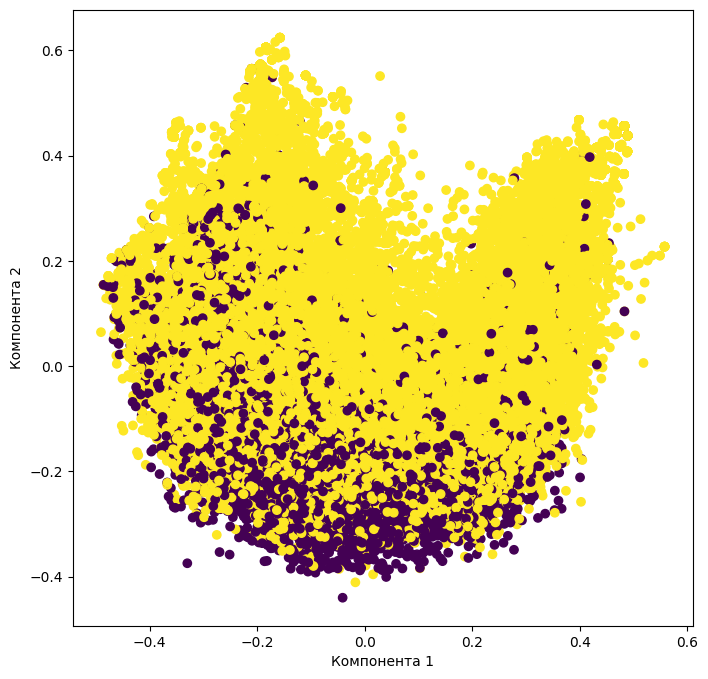

In [43]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=y_true)

plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению